# Práctica 2 - Parte 3: Modelo de horno eléctrico

En esta parte trabajaremos con un modelo simplificado de un horno eléctrico, como el que hemos visto en la teoría. El objetivo es comprender cómo evoluciona la temperatura y cómo se puede diseñar una ley de control para alcanzar un valor deseado.

---

## Enunciado general

1. Implementa en Python el modelo simplificado de un horno eléctrico representado como un sistema dinámico de primer orden.
2. Representa gráficamente la evolución de la temperatura para una entrada de potencia constante.
3. Diseña una ley de control sencilla que permita alcanzar una temperatura deseada $T_d$.
4. Analiza y discute el comportamiento obtenido.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Ejercicio 1

Implementa el modelo del horno eléctrico como un sistema dinámico de primer orden:

$
\dot{T}(t) = -a (T(t) - T_{amb}) + b u(t)
$

donde:
- $T(t)$ es la temperatura interna del horno,
- $T_{amb}$ es la temperatura ambiente,
- $u(t)$ es la potencia de entrada,
- $a>0$ y $b>0$ son parámetros del sistema.

Simula la evolución de $T(t)$ cuando $u(t)$ es constante y representa la gráfica.

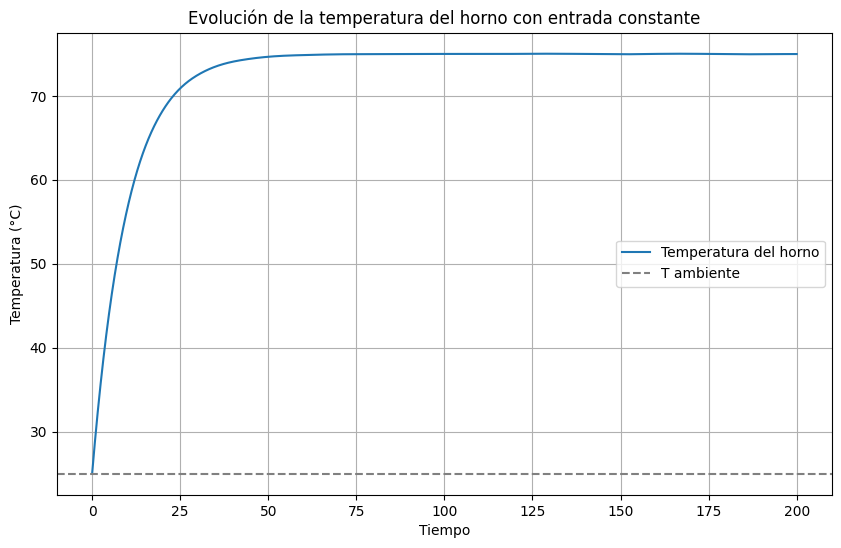

In [3]:
# Parámetros
a = 0.1
b = 0.5
T_amb = 25
u_const = 10
T0 = 25

def horno(t, T, a, b, u, T_amb):
    return -a*(T - T_amb) + b*u

t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(horno, t_span, [T0], t_eval=t_eval, args=(a, b, u_const, T_amb))

plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label="Temperatura del horno")
plt.axhline(T_amb, color="gray", linestyle="--", label="T ambiente")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura (°C)")
plt.title("Evolución de la temperatura del horno con entrada constante")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 2

Diseña una **ley de control** que lleve al horno a una temperatura deseada $T_d$. Una ley de control sencilla para $u(t)$ puede ser del tipo proporcional:

Simula y representa el comportamiento del horno con este control. Y marca con una línea discontinua la temperatura deseada.

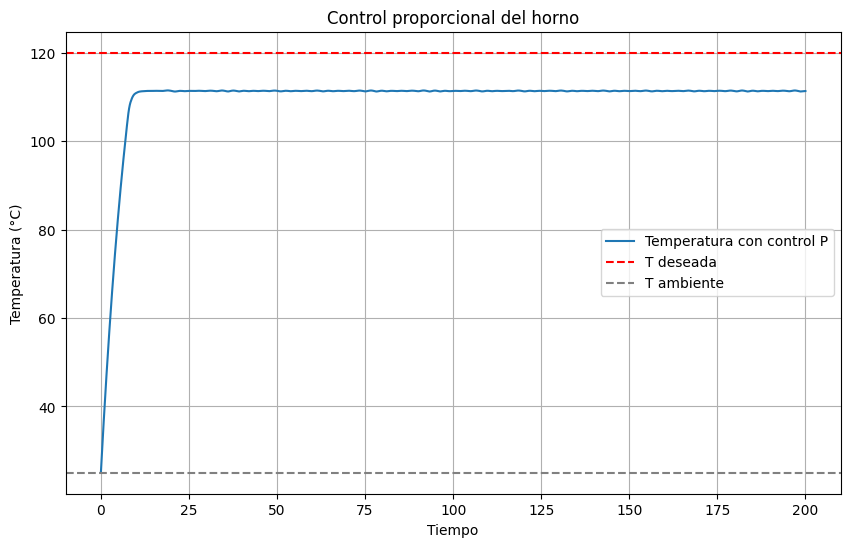

In [4]:
# Parámetros de control
T_d = 120
k_p = 2.0
u_max = 30.0
u_min = 0.0

def horno_control(t, T, a, b, T_amb, T_d, k_p, u_min, u_max):
    u = k_p * (T_d - T[0])
    u = np.clip(u, u_min, u_max)
    return [-a*(T[0] - T_amb) + b*u]

t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol_ctrl = solve_ivp(
    horno_control,
    t_span,
    [T0],
    t_eval=t_eval,
    args=(a, b, T_amb, T_d, k_p, u_min, u_max)
 )

plt.figure(figsize=(10,6))
plt.plot(sol_ctrl.t, sol_ctrl.y[0], label="Temperatura con control P")
plt.axhline(T_d, color="red", linestyle="--", label="T deseada")
plt.axhline(T_amb, color="gray", linestyle="--", label="T ambiente")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura (°C)")
plt.title("Control proporcional del horno")
plt.legend()
plt.grid(True)
plt.show()

## Preguntas de reflexión

1. ¿Cómo cambia el comportamiento del horno cuando se usa una entrada constante frente a una ley de control proporcional?
2. ¿Qué ocurre si la ganancia $k_p$ es muy pequeña? ¿Y si es demasiado grande?
3. ¿Qué diferencias observas entre la temperatura ambiente, la deseada y la alcanzada en cada caso?
4. ¿Cómo se relaciona este ejemplo con la noción de estabilidad vista en teoría?


## Respuestas (ampliadas)
1. **Entrada constante vs. control proporcional:** con $u(t)=u_{const}$ el sistema es lineal y converge a un equilibrio fijo $T^*=T_{amb}+\frac{b}{a}u_{const}$. La velocidad de convergencia depende de $a$ (constante de tiempo $\tau=1/a$). Con control proporcional $u(t)=k_p(T_d-T)$, el equilibrio se desplaza hacia el objetivo y queda $T^*=\frac{aT_{amb}+bk_p T_d}{a+bk_p}$, que se acerca a $T_d$ cuando $k_p$ crece. Además, la dinámica se “acelera” porque el polo efectivo pasa a $-(a+bk_p)$, así que el sistema puede responder más rápido.
2. **Efecto de la ganancia $k_p$:** si $k_p$ es pequeña, el control es débil: el error se corrige lentamente y el error en régimen es notable. Si $k_p$ es muy grande, la respuesta es rápida pero pueden aparecer saturaciones de $u$ (si hay límites), mayor sensibilidad al ruido y, en sistemas reales, oscilaciones o sobreimpulso. En este modelo de primer orden ideal, no se vuelve inestable, pero sí se puede observar comportamiento “agresivo” con saturación.
3. **Relación entre $T_{amb}$, $T_d$ y la temperatura alcanzada:** con entrada constante la temperatura final queda entre $T_{amb}$ y un valor superior determinado por $u_{const}$. Con control proporcional, la temperatura final se acerca a $T_d$, pero suele quedar un error estacionario porque el equilibrio no coincide exactamente con $T_d$ salvo que $k_p\to\infty$ o se añada acción integral (PID). La saturación en $u$ puede aumentar ese error.
4. **Relación con estabilidad:** el modelo es estable (tiene un equilibrio al que converge). El control proporcional mantiene la estabilidad y modifica la posición del equilibrio y la rapidez de convergencia. En términos de estabilidad, el estado permanece acotado y converge a un punto de equilibrio (estable asintóticamente) siempre que $a>0$ y $k_p\ge 0$.

## Ejercicio opcional: Control PID

Además del control proporcional, se puede utilizar un **control PID (Proporcional–Integral–Derivativo)** para mejorar la respuesta del horno.

La ley de control PID se expresa como:

$
u(t) = k_p e(t) + k_i \int e(t) dt + k_d \frac{de(t)}{dt}
$

donde $e(t) = T_d - T(t)$ es el error.

1. Implementa un controlador PID sencillo para el horno.
2. Simula y compara los resultados con el control proporcional.


In [ ]:
# Simulación PID simple (discretización Euler)
k_p_pid = 2.0
k_i_pid = 0.05
k_d_pid = 0.5

dt = 0.1
t_pid = np.arange(0, 200 + dt, dt)
T_pid = np.zeros_like(t_pid)
T_pid[0] = T0
integral = 0.0
prev_error = T_d - T_pid[0]

for i in range(1, len(t_pid)):
    error = T_d - T_pid[i-1]
    integral += error * dt
    derivative = (error - prev_error) / dt
    u = k_p_pid * error + k_i_pid * integral + k_d_pid * derivative
    u = np.clip(u, u_min, u_max)
    dT = -a * (T_pid[i-1] - T_amb) + b * u
    T_pid[i] = T_pid[i-1] + dT * dt
    prev_error = error

plt.figure(figsize=(10,6))
plt.plot(t_pid, T_pid, label="Temperatura con PID")
plt.axhline(T_d, color="red", linestyle="--", label="T deseada")
plt.axhline(T_amb, color="gray", linestyle="--", label="T ambiente")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura (°C)")
plt.title("Control PID del horno")
plt.legend()
plt.grid(True)
plt.show()